In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt
import matplotlib as mpl

In [4]:
sns.set_theme()

In [5]:
import os
import json

In [29]:
results_root = '/home/kwatchar3/bss_spatial_eval/results/highpass'

ddfs = os.listdir(results_root)
print(ddfs)


dfs = []

for d in ddfs:
    print(os.listdir(os.path.join(results_root, d)))
    df = pd.read_csv(os.path.join(results_root, d, 'results-ok.csv'))
    with open(os.path.join(results_root, d, 'args.json'), "r") as f:
        args = json.load(f)
    # print(args.get('estim_filter_kwargs'))
    if args['estim_filter_kwargs']:
        df['cutoff'] = args['estim_filter_kwargs']['Wn'][0]
    else:
        df['cutoff'] = 1
    dfs.append(df)

df = pd.concat(dfs)
df['est_deviation_j'] = df['est_deviation'].apply(lambda x: x + 1*np.random.randn()) 

# df = df[df['cutoff'] <= 4000]

palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

['20221128001003', '20221128001923', '20221128000857', '20221128000835', '20221128001058', '20221128001143', '20221128002654', '20221128000927', '20221128001029', '20221128001947', '20221128001120', '20221128002634', '20221128002714', '20221128001205', '20221128002009']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']
['results-ok.csv', 'args.json']


In [33]:
def set_axes(fig, ax, line=100):
    fig.colorbar(
        plt.cm.ScalarMappable(norm=mpl.colors.LogNorm(df.cutoff.min(), df.cutoff.max()), cmap=palette), 
        ax=ax, label='cutoff frequency (Hz)', 
        pad=0.01, aspect=30, 
        ticks=[1, 33, 1000, 2000, 4000],
        format=lambda v, t: f"{int(v//1000)}k" if v >= 1000 else str(v-1)
    )
    ax.legend_.remove()
    
    if line:
        ax.axhline(line, ls=':')

In [20]:
np.sort(df.cutoff.unique())

array([1.000e+00, 3.125e+01, 6.250e+01, 1.250e+02, 2.500e+02, 5.000e+02,
       1.000e+03, 2.000e+03, 3.000e+03, 4.000e+03, 5.000e+03, 6.000e+03,
       7.000e+03])

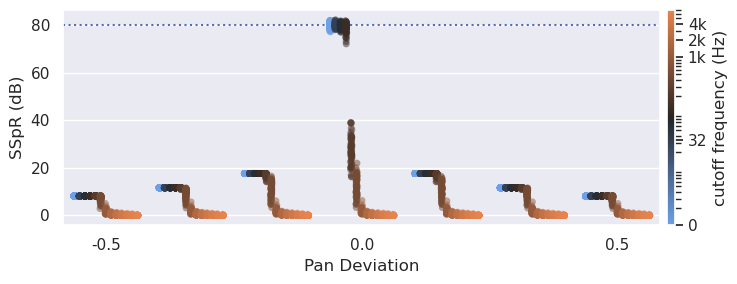

In [37]:
# dfj = df[~(df['est_deviation'] == 0.0)] #[~((df['est_deviation'] == 0.0) & (df['filt'].str.contains('no')))].copy()
fig, ax = plt.subplots(figsize=(8, 3))
 
df['pan_deviation'] = df['est_deviation'].apply(lambda x: x/90) 
line = 80
    
df['spr/numx'] = df['spr/num'].apply(
    lambda x: x if x < line else line + np.random.randn()
)

# df = df[df.cutoff < 500]
    
ax = sns.stripplot(df,  y='spr/numx', x='pan_deviation', hue='cutoff', ax=ax, alpha=0.5, dodge=True, palette=palette, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='SSpR (dB)', xlabel='Pan Deviation', xticks=[0, 3, 6])
# ax.grid(True, 'minor', 'x')
# ax.grid(True, 'major', 'both')

# e = 0.05
# x = np.linspace(-0.5, -e, 100)
# sns.lineplot(x=(x+0.5)*8, y=ideal_stereo_spr(0, x), color='r', zorder=2, linestyle=":") 

# x = np.linspace(e, 0.75, 100)
# sns.lineplot(x=x, y=ideal_stereo_spr(0, x), color='r', zorder=2, linestyle=":") 


set_axes(fig, ax, line)
plt.tight_layout()
plt.savefig('highpass-sspr.png', dpi=300)
plt.show()

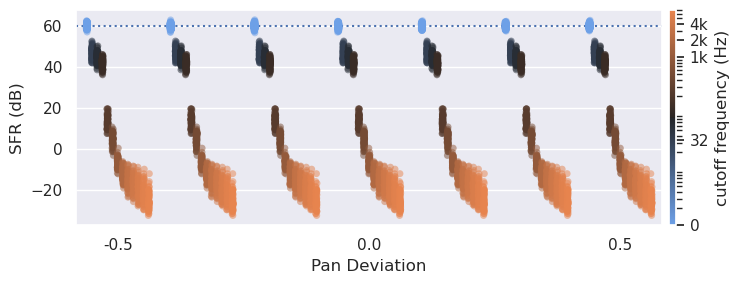

In [35]:
# ax = sns.scatterplot(df[~(df['filt'].str.contains('no'))], x='est_deviation_j', y='sfr/num', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(8, 3))

line = 60

df['sfr/numx'] = df['sfr/num'].apply(
    lambda x: x if x < line else line + np.random.randn()
)

ax = sns.stripplot(df,  y='sfr/numx', x='pan_deviation', hue='cutoff', palette=palette, ax=ax, alpha=0.5, dodge=True, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='SFR (dB)', xlabel='Pan Deviation', xticks=[0, 3, 6])

set_axes(fig, ax, line)
plt.tight_layout()
plt.savefig('highpass-sfr.png', dpi=300)
plt.show()

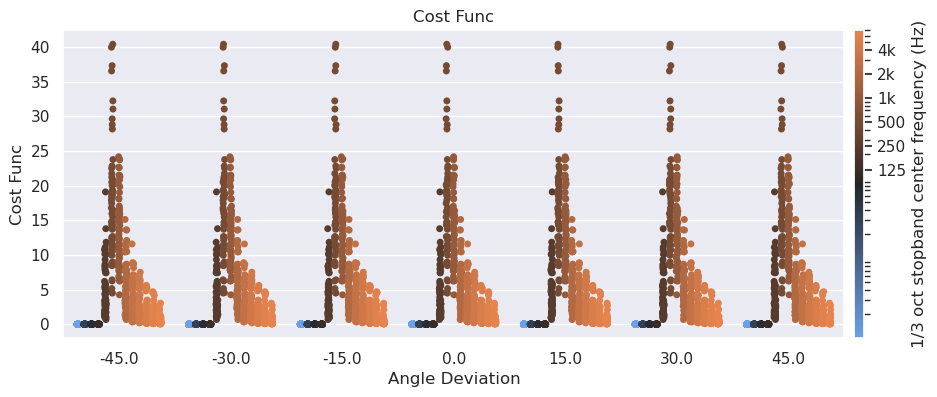

In [73]:
# ax = sns.scatterplot(df, x='est_deviation_j', y='cost', marker='.', hue='filt', ec="none", alpha=0.5)

fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.stripplot(df, x='est_deviation', y='cost', palette=palette, hue='cutoff', ax=ax, dodge=True, hue_norm=mpl.colors.LogNorm())
ax.set(ylabel='Cost Func', title='Cost Func', xlabel='Angle Deviation')
set_axes(fig, ax, line=False)
plt.show()